# EDA: Laptop Price Prediction
## Initial data loading and cleaning

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

DATA_PATH = os.path.join('..', 'data', 'train_data.csv')
df = pd.read_csv(DATA_PATH)

print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print(f"\nNumber of duplicate rows before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
dtypes: float64(2), object(9)
memory usage: 100.8+ KB

Missing Values:
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys              

### Print dataset head

In [85]:
print("\nDataFrame Head:")
display(df.head())


DataFrame Head:


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


### Summary statistics of all the columns in the dataset

In [86]:
print("\nSummary Statistics:")
display(df.columns)
display(df.describe(include='all'))


Summary Statistics:


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1147,1147,1147.000000,1147,1147,1147,1147,1147,1147,1147,1147.000000
unique,19,6,NaN,39,111,9,38,104,9,172,NaN
top,Lenovo,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,261,642,NaN,458,167,550,369,248,940,108,NaN
mean,NaN,NaN,15.049869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60710.369806
std,NaN,NaN,1.414944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37549.849518
min,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32767.200000
50%,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52746.667200
75%,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79813.440000


### Unique value count of each column

In [87]:
print("\nUnique Value Counts:")
for col in df.columns:
    unique_vals = df[col].value_counts(dropna=False)
    print(f"Column: {col}")
    print(unique_vals)
    print("-" * 40)


Unique Value Counts:
Column: Company
Company
Lenovo       261
Dell         259
HP           247
Asus         131
Acer          93
MSI           49
Toshiba       43
Apple         20
Razer          7
Mediacom       7
Samsung        7
Microsoft      6
Xiaomi         4
Vero           3
Fujitsu        3
Huawei         2
LG             2
Chuwi          2
Google         1
Name: count, dtype: int64
----------------------------------------
Column: TypeName
TypeName
Notebook              642
Gaming                187
Ultrabook             170
2 in 1 Convertible    100
Workstation            27
Netbook                21
Name: count, dtype: int64
----------------------------------------
Column: Inches
Inches
15.6    590
14.0    169
17.3    151
13.3    145
12.5     30
11.6     28
13.5      6
13.9      6
12.0      5
15.4      4
12.3      3
10.1      3
13.0      2
15.0      2
14.1      1
11.3      1
17.0      1
Name: count, dtype: int64
----------------------------------------
Column: ScreenResoluti

## Target variable analysis (Price)

The Price column is the target variable, which is heavily right-skewed. Since linear regression works on the assumption of a relatively noraml ditrubution, we apply a log transfotmation to normalize the distribution.

We will also be predicting the same log transformation, and then convert it back to the original scale for output.

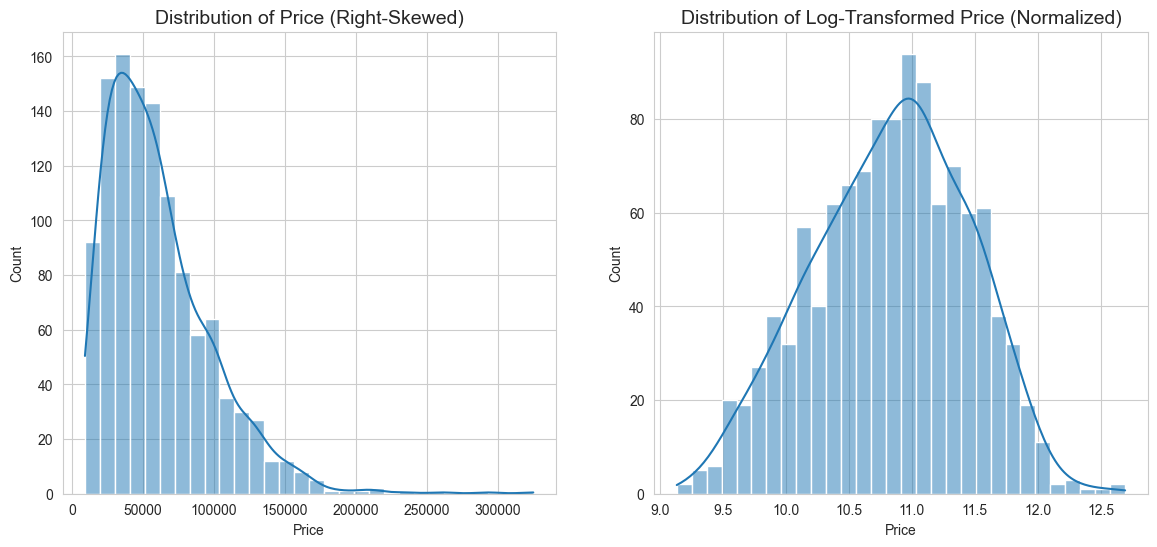

In [88]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price (Right-Skewed)', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price']), kde=True, bins=30)
plt.title('Distribution of Log-Transformed Price (Normalized)', fontsize=14)

plt.show()

## Feature analysis

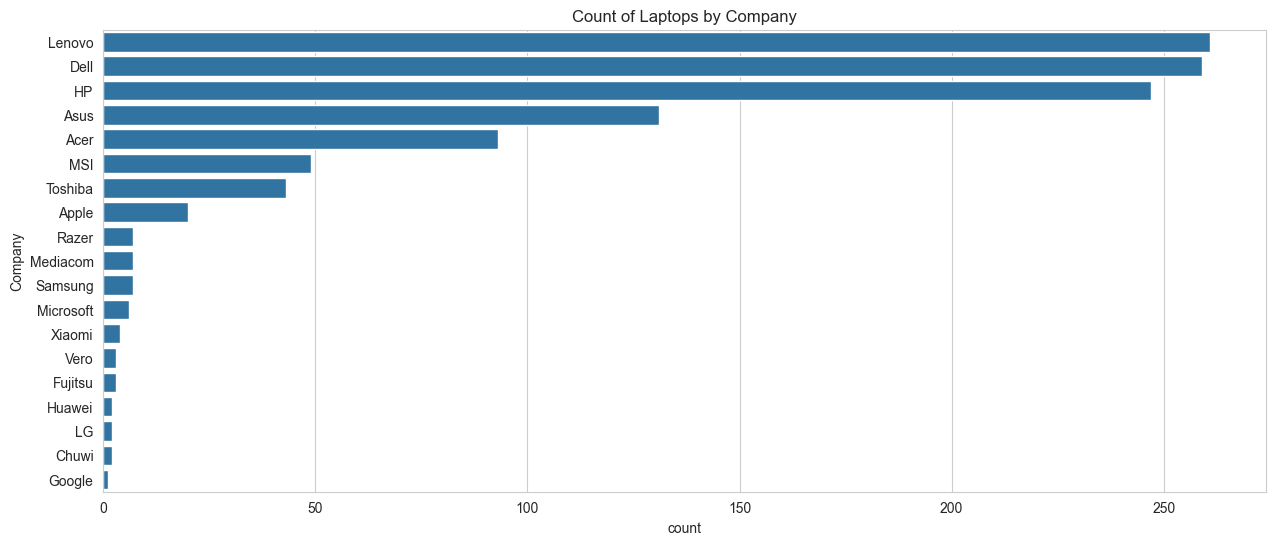

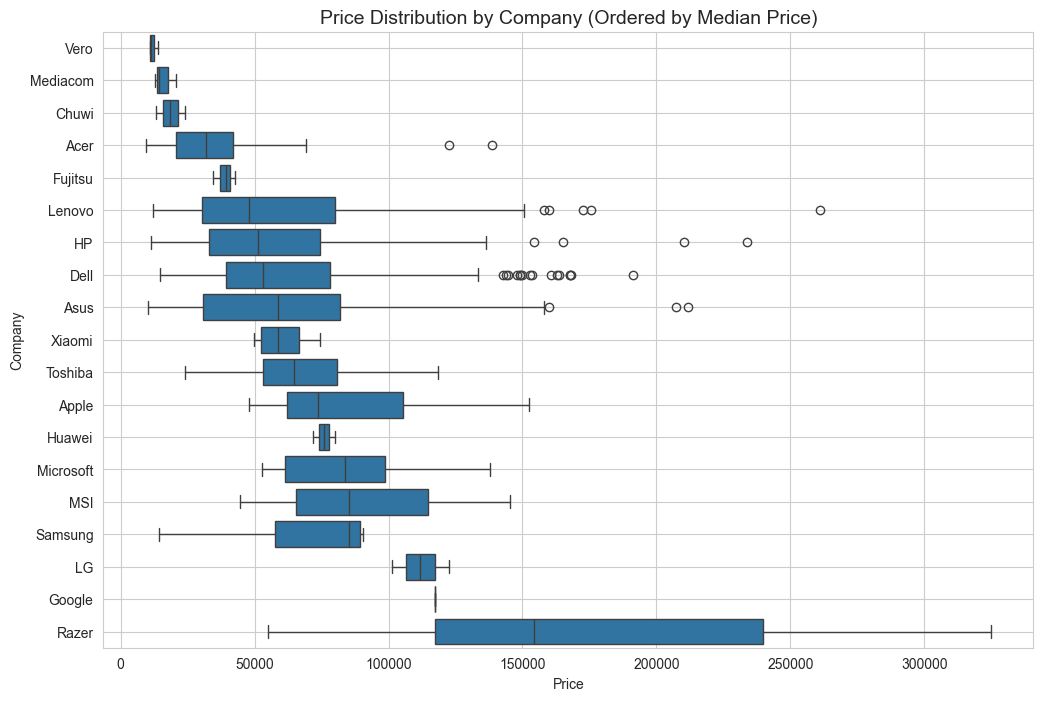

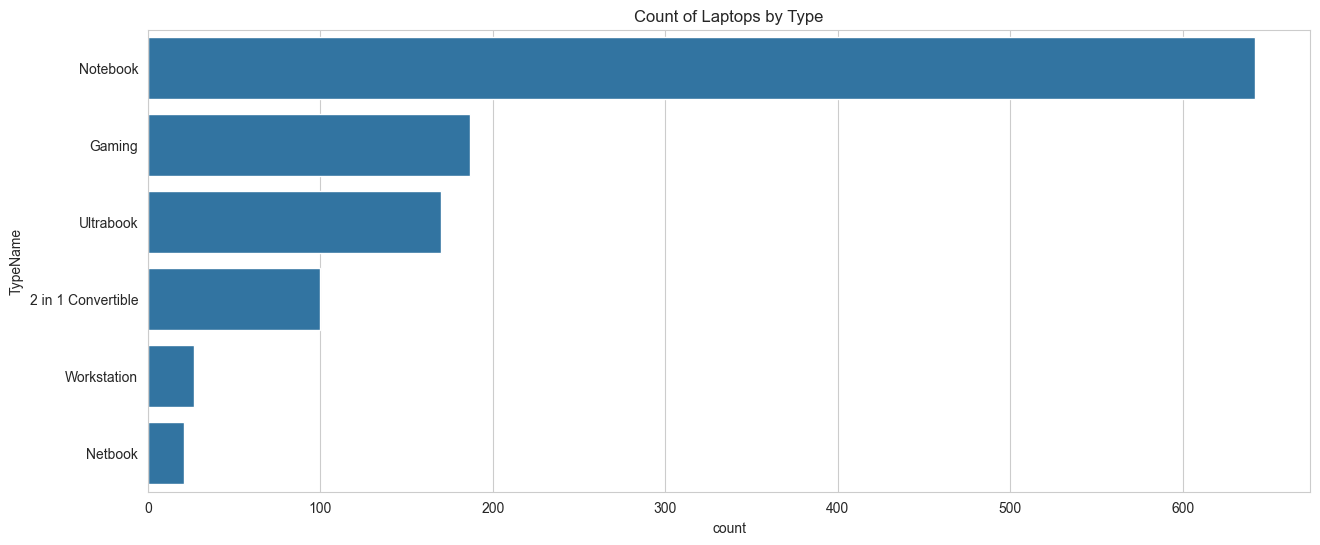

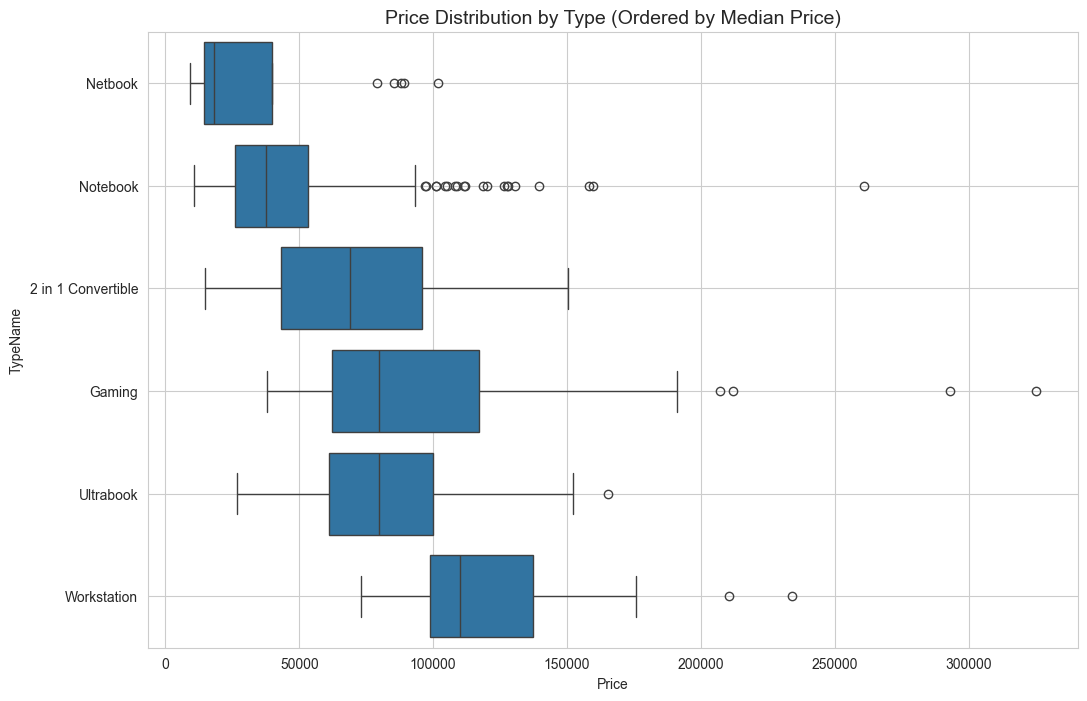

In [ ]:
# Analysis by Company
plt.figure(figsize=(15, 6))
sns.countplot(y='Company', data=df, order=df['Company'].value_counts().index)
plt.title('Count of Laptops by Company')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Price', y='Company', data=df, order=df.groupby('Company')['Price'].median().sort_values().index)
plt.title('Price Distribution by Company (Ordered by Median Price)', fontsize=14)
plt.grid(True)
plt.show()

# Analysis by TypeName
plt.figure(figsize=(15, 6))
sns.countplot(y='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.title('Count of Laptops by Type')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Price', y='TypeName', data=df, order=df.groupby('TypeName')['Price'].median().sort_values().index)
plt.title('Price Distribution by Type (Ordered by Median Price)', fontsize=14)
plt.grid(True)
plt.show()

### Numeric features with text

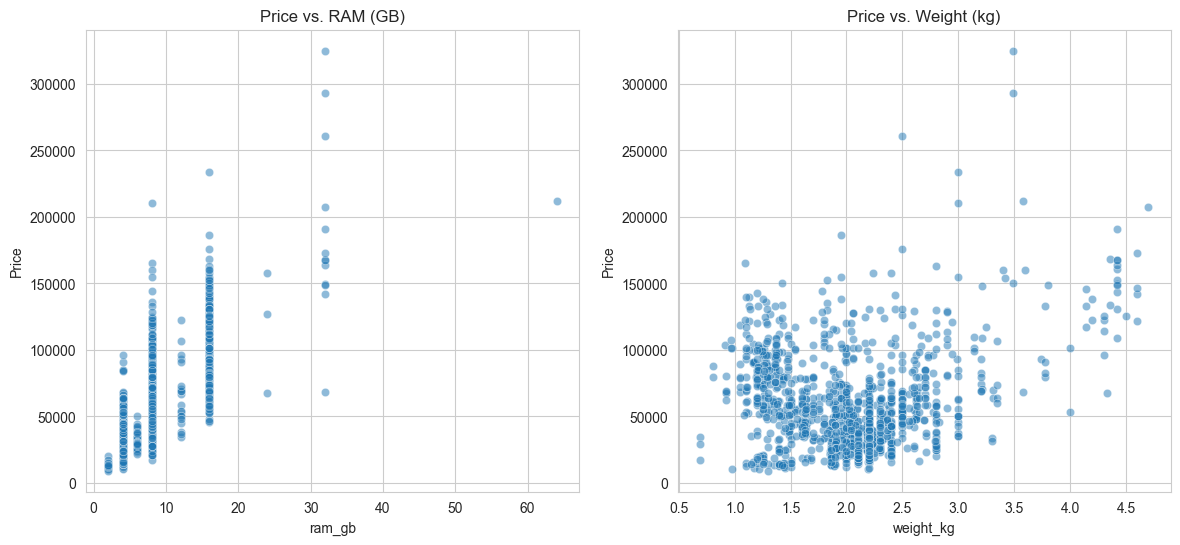

In [91]:
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df['weight_kg'] = df['Weight'].str.replace('kg', '').astype(float)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='ram_gb', y='Price', data=df, alpha=0.5)
plt.title('Price vs. RAM (GB)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='weight_kg', y='Price', data=df, alpha=0.5)
plt.title('Price vs. Weight (kg)')
plt.show()

## Feature engineering
### Screen resolution

We extract `Touchscreen`, `IPS Panel`, and calculate pixels per inch (PPI). It can serve as a more robust feature than the resolution alone.

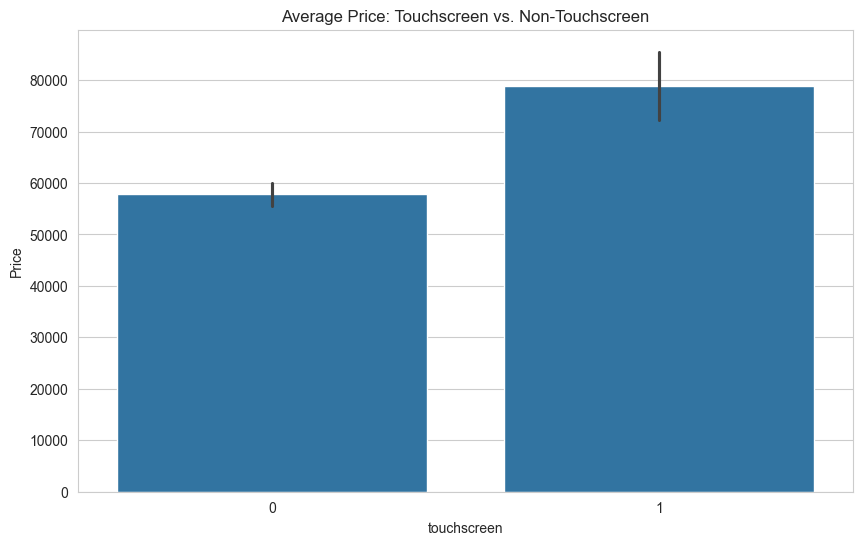

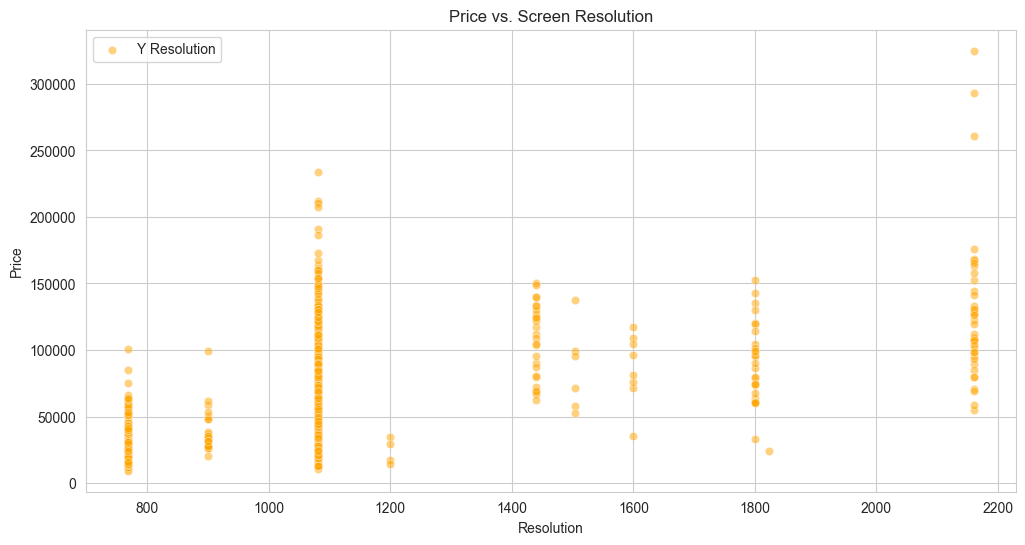

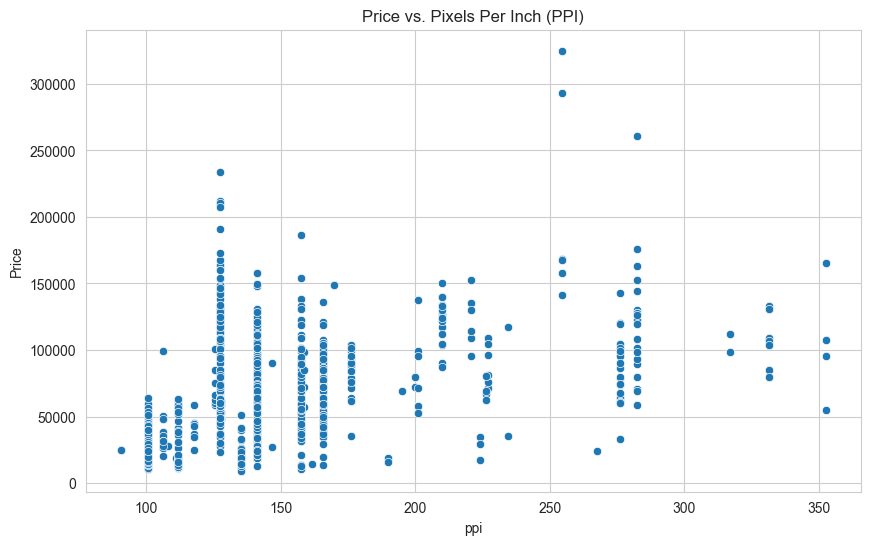

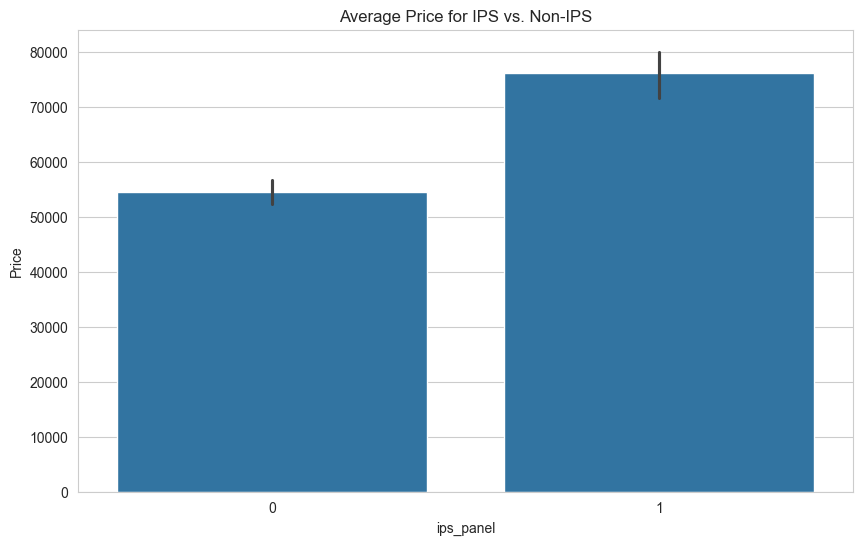

In [97]:
# Extract boolean features
df['touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['ips_panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

# Extract resolution
resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['x_res'] = resolution[0].astype(int)
df['y_res'] = resolution[1].astype(int)

# Engineer PPI
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches']).astype(float)

sns.barplot(x='touchscreen', y='Price', data=df)
plt.title('Average Price: Touchscreen vs. Non-Touchscreen')
plt.show()

# Visualize extracted screen resolution vs. price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='y_res', y='Price', data=df, alpha=0.5, label='Y Resolution', color='orange')
plt.title('Price vs. Screen Resolution')
plt.xlabel('Resolution')
plt.ylabel('Price')
plt.legend()
plt.show()

sns.scatterplot(x='ppi', y='Price', data=df)
plt.title('Price vs. Pixels Per Inch (PPI)')
plt.show()

sns.barplot(x='ips_panel', y='Price', data=df)
plt.title('Average Price for IPS vs. Non-IPS')
plt.show()